# Numpy Warriors
**Group Members:**  
- 1005501 Harikrishnan Chalapathy Anirudh
- 1005802 Swastik Majumdar
- 1005374 Nguyen Thai Huy
- 1005147 Hayden Ang Wei En 
- 1005265 Win Tun Kyaw

## Task 1: Implement Logistic Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("train_tfidf_features.csv")
df1 = pd.read_csv("test_tfidf_features.csv")
df

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17180,17181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17181,17182,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17182,17183,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,id,label,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,...,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000,17184.000000
mean,8592.500000,0.381227,0.000150,0.001066,0.001532,0.000369,0.000140,0.000066,0.000270,0.000483,...,0.000202,0.000429,0.000286,0.000075,0.000260,0.000709,0.000257,0.000121,0.000308,0.000159
std,4960.737848,0.485702,0.008297,0.019532,0.024741,0.012334,0.008276,0.005065,0.009907,0.013106,...,0.010215,0.013178,0.011378,0.005866,0.010864,0.017641,0.010246,0.006529,0.010526,0.008536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4296.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8592.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12888.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17184.000000,1.000000,0.676327,0.560830,0.958430,0.646740,0.532789,0.437760,0.435835,0.536746,...,0.611122,0.540809,0.566613,0.592170,0.617341,0.850605,0.484908,0.398105,0.430031,0.528556


In [4]:
train_target = df['label'].to_numpy()
train_features = df.drop(['id','label'], axis = 1).to_numpy()
test_features = df1.drop(['id'], axis = 1).to_numpy()
print("Shape of target : ", train_target.shape)
print("Shape of features : ", train_features.shape)
train_features

Shape of target :  (17184,)
Shape of features :  (17184, 5000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
import math
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def loss(y, y_pred):
    loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
    return loss

In [7]:
def gradients(X, y, y_pred): 
    # X is the input, y is the target value, y_pred is the prediction.
    
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_pred - y))
    db = (1/m)*np.sum((y_pred - y)) 
    
    return dw, db

In [8]:
def train(X, y, bs, epochs, lr):
    # X is the input, y is the target value, y_pred is the prediction.
    # bs is the batch size, epochs is the number of iterations and lr is the learning rate.

    m, n = X.shape
    
    # Initialize weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Initialize an empty list to store the losses.
    losses = []
    
    # Training
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Define the batches.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculate the prediction.
            y_pred = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss with respect to the parameters.
            dw, db = gradients(xb, yb, y_pred)
            
            # Update the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses.
    return w, b, losses

In [9]:
def predict(X,w,b):
    
    # Calculating predictions.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [10]:
w, b, l = train(train_features, train_target, bs = 100, epochs = 1000, lr = 0.01)

In [11]:
def accuracy(y, y_pred):
    accuracy = np.sum(y == y_pred) / len(y)
    return accuracy

In [12]:
print(accuracy(train_target, predict(train_features, w, b)))

0.706762104283054


In [13]:
#predictions = pd.DataFrame(predict(test_features, w ,b))
#pd.concat([predictions,df1['id']],axis = 1).to_csv("LogRed_Prediction.csv")

## Task 2: Apply dimension reduction techniques

In [14]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [15]:
dataset= pd.read_csv("train_tfidf_features.csv")
test_dataset = pd.read_csv("test_tfidf_features.csv")

x = dataset.drop(["label","id"],axis = 1).to_numpy()
y = dataset["label"].to_numpy()

x_test = test_dataset.drop(["id"],axis = 1).to_numpy()

**Reducing dimension of training set**

In [16]:
scaling = StandardScaler()
scaling.fit(x)
Scaled_data1 = scaling.transform(x)

In [17]:
pca_100 = PCA(n_components = 100)
pca_100.fit(Scaled_data1)
x_100 = pca_100.transform(Scaled_data1)
print(x_100.shape)

(17184, 100)


In [18]:
pca_500 = PCA(n_components = 500)
pca_500.fit(Scaled_data1)
x_500 = pca_500.transform(Scaled_data1)
print(x_500.shape)

(17184, 500)


In [19]:
pca_1000 = PCA(n_components = 1000)
pca_1000.fit(Scaled_data1)
x_1000 = pca_1000.transform(Scaled_data1)
print(x_1000.shape)

(17184, 1000)


In [20]:
pca_2000 = PCA(n_components = 2000)
pca_2000.fit(Scaled_data1)
x_2000 = pca_2000.transform(Scaled_data1)
print(x_2000.shape)

(17184, 2000)


**Reducing dimension of test set**

In [21]:
scaling = StandardScaler()
scaling.fit(x_test)
Scaled_data = scaling.transform(x_test)

In [22]:
pca_100 = PCA(n_components = 100)
pca_100.fit(Scaled_data)
x_test_100 = pca_100.transform(Scaled_data)
print(x_test_100.shape)

(4296, 100)


In [23]:
pca_500 = PCA(n_components = 500)
pca_500.fit(Scaled_data)
x_test_500 = pca_500.transform(Scaled_data)
print(x_test_500.shape)

(4296, 500)


In [24]:
pca_1000 = PCA(n_components = 1000)
pca_1000.fit(Scaled_data)
x_test_1000 = pca_1000.transform(Scaled_data)
print(x_test_1000.shape)

(4296, 1000)


In [25]:
pca_2000 = PCA(n_components = 2000)
pca_2000.fit(Scaled_data)
x_test_2000 = pca_2000.transform(Scaled_data)
print(x_test_2000.shape)

(4296, 2000)


In [26]:
#2000 components training f1 score
neigh_2000 = KNeighborsClassifier(n_neighbors=2)
neigh_2000.fit(x_2000, y)

#1000 components training f1 score
neigh_1000 = KNeighborsClassifier(n_neighbors=2)
neigh_1000.fit(x_1000, y)

#500 components training f1 score
neigh_500 = KNeighborsClassifier(n_neighbors=2)
neigh_500.fit(x_500, y)

#100 components training f1 score
neigh_100 = KNeighborsClassifier(n_neighbors=2)
neigh_100.fit(x_100, y)

KNeighborsClassifier(n_neighbors=2)

In [27]:
import time
start_time_2000 = time.time()
predictions_2000 = neigh_2000.predict(x_test_2000)
print("--- %s seconds ---" % (time.time() - start_time_2000))
start_time_1000 = time.time()
predictions_1000 = neigh_1000.predict(x_test_1000)
print("--- %s seconds ---" % (time.time() - start_time_1000))
start_time_500 = time.time()
predictions_500 = neigh_500.predict(x_test_500)
print("--- %s seconds ---" % (time.time() - start_time_500))
start_time_100 = time.time()
predictions_100 = neigh_100.predict(x_test_100)
print("--- %s seconds ---" % (time.time() - start_time_100))

--- 50.6638720035553 seconds ---
--- 1.2869670391082764 seconds ---
--- 0.7224512100219727 seconds ---
--- 0.2800109386444092 seconds ---


In [28]:
# pd.concat([pd.DataFrame(predictions_2000),test_dataset['id']],axis = 1).to_csv("knn_predictions_2000.csv")
# pd.concat([pd.DataFrame(predictions_1000),test_dataset['id']],axis = 1).to_csv("knn_predictions_1000.csv")
# pd.concat([pd.DataFrame(predictions_500),test_dataset['id']],axis = 1).to_csv("knn_predictions_500.csv")
# pd.concat([pd.DataFrame(predictions_100),test_dataset['id']],axis = 1).to_csv("knn_predictions_100.csv")

- **F1 score for 100: 0.52971**
- **F1 score for 500: 0.49234**
- **F1 score for 1000: 0.43323**
- **F1 score for 2000 : 0.33998**

## Analysis of the reduced components
- **Time** - By using the time module, we were able to record the time taken for each prediction.  We obtained 53.19764566421509 seconds for n_components = 2000, 1.2955138683319092 seconds for n_components = 1000, 0.733565092086792 seconds for n_components = 500 and 0.30568814277648926 seconds for n_components = 100. Thus, we can see that, as we reduce the dimension, we can also reduce the time required to train the machine learning model. This is mainly because the lower the dimension, the less computationally expensive it is. Thus, training takes less time while retaining our accuracies, which increases our efficiency.
- **F1 score** - We also noticed that the F1 score reduced as the dimensions increased. We find that for KNN, reduced dimensions work better for model accuracy, and this further supports our motive for using PCA to reduce the dimensions.


## Task 3: Try other machine learning models

In [29]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN

***Data pre-processing***
-   **SMOTE (Synthetic Minority Oversampling Technique)**  
While performing exploratory data analysis, we found that our dataset is highly skewed to one side. We have more 0's than we have 1's. As a result, while predicting unseen data, our models are more likely to choose 0 as compared to 1. To solve this issue, we tried "oversampling". In this technique, we synthetically generate new data items from the minority class. We keep generating new items until the ratio of the classes comes out to be 1:1. Now, the model trains on equal number of 1's as it does to 0's. Thus, whenever it predicts on unseen data, it is not biased to choose either class.
-   **StandardScaler**  
Using StandardScaler, we will standardize the features by scaling to unit variance. Several machine learning estimators rely on standardization of datasets. If the individual features do not follow a standard normally distributed distribution, they may behave poorly.
-   **MinMaxScaler**  
Using MinMaxScaler, we will scale each feature individually so that it fits within the training set's range.


In [30]:
dataset= pd.read_csv("train_tfidf_features.csv")
test_dataset = pd.read_csv("test_tfidf_features.csv")

final_test_x = test_dataset.drop(["id"],axis=1)
final_test_id = test_dataset["id"]

x_original = dataset.drop(["label","id"],axis = 1)
y_original = dataset["label"]

#Balance dataset
x, y = SMOTE().fit_resample(x_original, y_original)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

st_scaler= StandardScaler()
st_scaler2= StandardScaler()
mm_scaler = MinMaxScaler()

## STD Scale
x_train_st = st_scaler.fit_transform(x_train) 
x_test_st = st_scaler.transform(x_test) 
x_st = st_scaler2.fit_transform(x) 
final_test_st = st_scaler2.transform(final_test_x) 

## MM Scale
x_train_mm = mm_scaler.fit_transform(x_train)
x_test_mm = mm_scaler.transform(x_test)


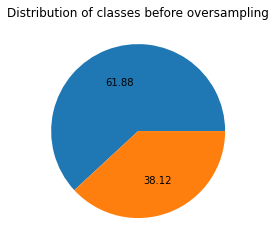

In [31]:
plt.pie(y_original.value_counts(), autopct="%0.2f")
plt.title("Distribution of classes before oversampling")
plt.show()

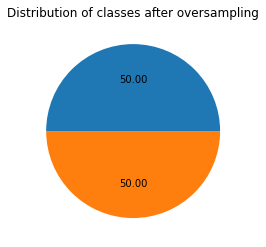

In [32]:
plt.pie(y.value_counts(), autopct="%0.2f")
plt.title("Distribution of classes after oversampling")
plt.show()

**Logistic Regression Classifier with tuned parameters**

**Parameters used:** class_weight = "balanced", C = 2e-4  
We made use of the regularization parameter C. The lower value the value of C, higher the regularization. Thus, we set our C value to be very low , 2e-4. We observed that if we increased C, then the model was performing poorly. We also set our class_weight=balanced. This is so that sklearn automatically gives a certain class its weightage depending on the frequency of the class occurring, and there is no bias to a certain class.

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight = "balanced", C = 2e-4)
model.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, model.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, model.predict(x_test_st)))

predictions = pd.DataFrame(model.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("Logistic_with_tuning.csv")

0.8442235540612971
0.7671957671957672


**Gradient Boosting Classifier**

**Parameters used:** n_estimators = 600, learning_rate = 0.25, max_depth = 6  
We first ran the model with the default value of n_estimators = 100. Due to Gradient Boost's robustness to over-fitting, it typically performs better with a larger number. Thus, to find the sweet spot, we plotted a graph between the F1 score and n_estimators. From the graph, we see that there is a slight peak at n_estimators = 600.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.25, max_depth = 6)
gbc.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, gbc.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, gbc.predict(x_test_st)))
predictions = pd.DataFrame(gbc.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("gradient_boost.csv")

0.9745944596955328
0.77959927140255


## Final model selected (Best performing) : Extra Trees Classifier

**Parameters used:** n_estimators = 500, max_depth = 1000, criterion = 'log_loss'

We first ran the model with the default value of n_estimators = 100. We then plotted a graph between the F1 score and n_estimators. From the graph, we observed that the accuracy of the model generally remained constant as we increased the number of estimators.  Thus, we finalized n_estimators = 500.

Moving on, we adjusted the max_features parameter, by manually trying the three options of {“sqrt”, “log2”, None}. We observed that sqrt gave us the best results.

Additionally, we tuned the max_depth and the criterion parameters. Similar to n_estimators, we plotted a graph between the F1 score and max_depth. From the graph, we observe a slight peak at max_depth = 1000.

For criterion we tried the three parameters manually, and found that the resulting accuracies were quite similar, but criterion = ‘log_loss’ gave us the best accuracy.

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
et= ExtraTreesClassifier(n_estimators = 500, max_depth = 1000, criterion = 'log_loss')
et.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, et.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, et.predict(x_test_st)))

predictions = pd.DataFrame(et.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("extra_trees.csv")

0.997123015873016
0.8107109879963067


**Voting Classifier with Extra Trees, Logistic regression and Gradient Boost**

**Parameters used:** voting = "soft", n_jobs = -1  
For voting classifier, we chose extra trees, logistic and gradient boosting classifiers, as these three were our top performing models. However, the total accuracy we got was still lesser than our best model, which was extra trees.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
et = ExtraTreesClassifier()
logistic = LogisticRegression()
xgb = GradientBoostingClassifier()
estimators = [("extra trees", et), ("logistic regression", logistic), ("gradient boost", xgb)]

ensemble = VotingClassifier(estimators, voting = "soft", n_jobs = -1)
ensemble.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, ensemble.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, ensemble.predict(x_test_st)))

predictions = pd.DataFrame(ensemble.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("voting.csv")

0.9880103051922315
0.7949412827461608


**Bagging Classifier** 

**Parameters used: n_estimators = 10**   
For bagging classifier, we chose extra trees with n_estimators = 10 because we felt that extra trees classifier was very rigid in training the data. However, bagging classifier also underperformed compared to extra tree classifier. We  also plotted a graph between F1 score and n_estimators. We see a slight decrease in the F1 score as we apply n_estimators of more than 10.

In [37]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator = ExtraTreesClassifier(),n_estimators = 10)
bag.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, bag.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, bag.predict(x_test_st)))

predictions = pd.DataFrame(ensemble.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("bagging.csv")

0.9941532058269745
0.815018315018315


**Random Forest Classifier**

**Parameters used: max_depth = 25**    
By plotting a graph between F1 score and max_depth, we found that the F1 score was increasing as the max_depth increased.   Hence, we chose max_depth = 25 considering the time required to train the model.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth = 25)
rf.fit(x_train_st, y_train)

print(sklearn.metrics.f1_score(y_train, rf.predict(x_train_st)))
print(sklearn.metrics.f1_score(y_test, rf.predict(x_test_st)))

predictions = pd.DataFrame(rf.predict(final_test_st))
#pd.concat([predictions,final_test_id],axis = 1).to_csv("random_forest.csv")

0.7894094928346376
0.7126654064272211
